### Problem Statement
- The City Hotel and Resort Hotel have seen high cancellation rates in recent years.Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use.
- Therefore, **reducing cancellation rates is the main objective for both hotels in order to boost their revenue-generating efficiency and for us to provide comprehensive business assistance to deal with this issue**.
- The primary subjects of this study are the analysis of hotel booking cancellations along with other elements that don't affect their business or annual revenue generating.

### Data Source - https://www.kaggle.com/datasets/mojtaba142/hotel-booking


### Step-1 Imporing necassary Libraries/Dependecies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step-2 Load Dataset

In [3]:
df=pd.read_csv('hotel_bookings_data.csv'

### Step-3 EDA and Data Cleaning

In [8]:
df.head(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/4/2015


In [5]:
df.shape

(119390, 32)

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

-  In above info() you can see **reservation_status_date** is in object datatype it is the main column we will work on so change it to **Datetime**.

In [18]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

- To check which columns are of object datatype

In [24]:
column_types = df.dtypes
object_columns = column_types[column_types == 'object'].index.tolist()
# Display the object columns
print("Columns with object data type:")
print(object_columns)


Columns with object data type:
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


In [26]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in object data type column '{column}': {unique_values}")
    print('-'*50)
    print(f"Number of unique values in column '{column}': {len(unique_values)}")

Unique values in object data type column 'hotel': ['Resort Hotel' 'City Hotel']
--------------------------------------------------
Number of unique values in column 'hotel': 2
Unique values in object data type column 'arrival_date_month': ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
Number of unique values in column 'arrival_date_month': 12
Unique values in object data type column 'meal': ['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
Number of unique values in column 'meal': 5
Unique values in object data type column 'country': ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 

- Check missing values

In [27]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- Columns which have null vales
  - country                             ( 488)
  - agent                              (16340)
  - company                           (112593)
- we ar toe going discard **company** as it is missing almost all values from rows and it is not possible to handle these missing values and **agent** column also have some missing values.

In [33]:

df.drop(columns=['company','agent'],axis=1, inplace=True)


KeyError: "['company', 'agent'] not found in axis"

In [35]:
df.dropna(inplace=True)

In [36]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

- As you can see we have drop all those columns with missing values kepping the context of dataset  and to maintain data integrity

In [37]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


- After analysing decsribe() we can see that there are some outliers in this dataset

<Axes: >

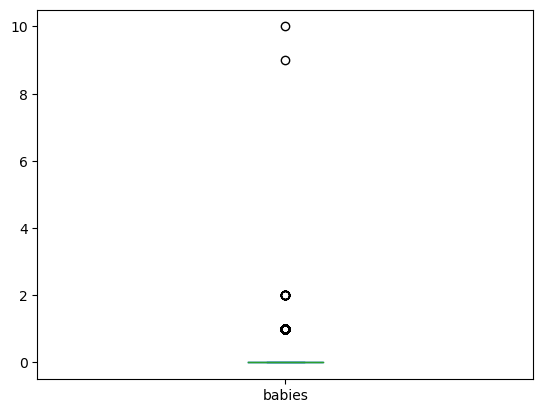

In [39]:
df['babies'].plot(kind='box')

<Axes: >

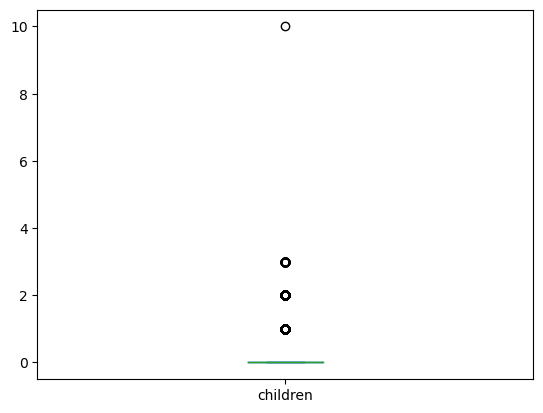

In [40]:
df['children'].plot(kind='box')

-  Columns like **Children** and **babies** have some outliers but they are irrelevant to our analysis so we an keep it or we can drp it won't have any affect

<Axes: >

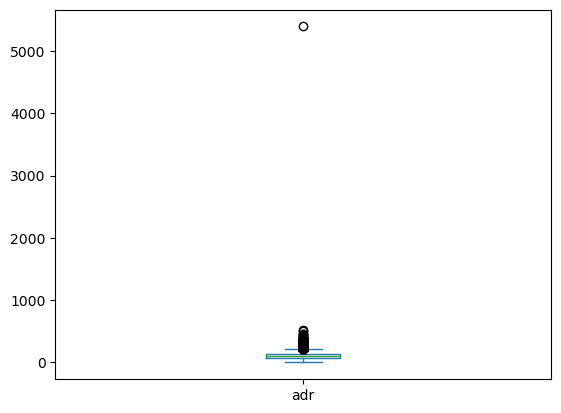

In [38]:
df['adr'].plot(kind='box')

- But incase of **adr** the max value is 5400 and we can see that in our box plot only one point crosses 5000 value 
- ADR values that are significantly negative or extremely high, such as -6 or 5400, could indeed be considered outliers and may warrant further investigation,so we should restrict this column to take only those vlues which are less than 5000

In [41]:
df=df[df['adr']<5000]

In [42]:

df.drop(columns=['babies'],axis=1, inplace=True)


In [43]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


### Step 4 - Data Analysis and Visualization
  - Keep in mind problem statement

###### Checking the percentage of cancellation rate and not cancellation rate

In [46]:
cancelled_bookings_perc=df['is_canceled'].value_counts(normalize=True)

In [48]:
cancelled_bookings_perc*100
# 0 means not cancelled and 1 mean cancelled which is 37% which is alarming 

is_canceled
0    62.865337
1    37.134663
Name: proportion, dtype: float64

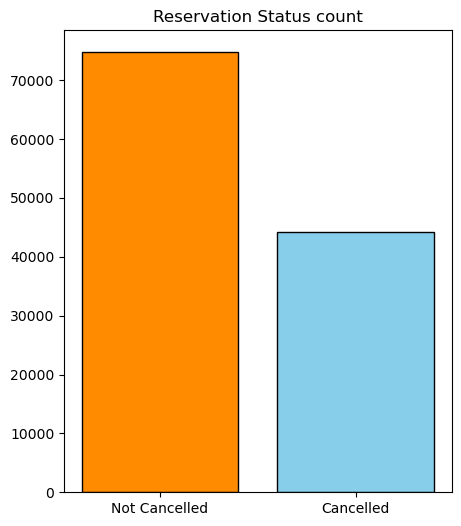

In [58]:
colors = ['darkorange', 'skyblue']
plt.figure(figsize=(5,6))
plt.title('Reservation Status count')
plt.bar(['Not Cancelled','Cancelled'],df['is_canceled'].value_counts(),edgecolor='k',color=colors,width=0.8)
plt.show()

##### Checking which hotel has most cancellation rate

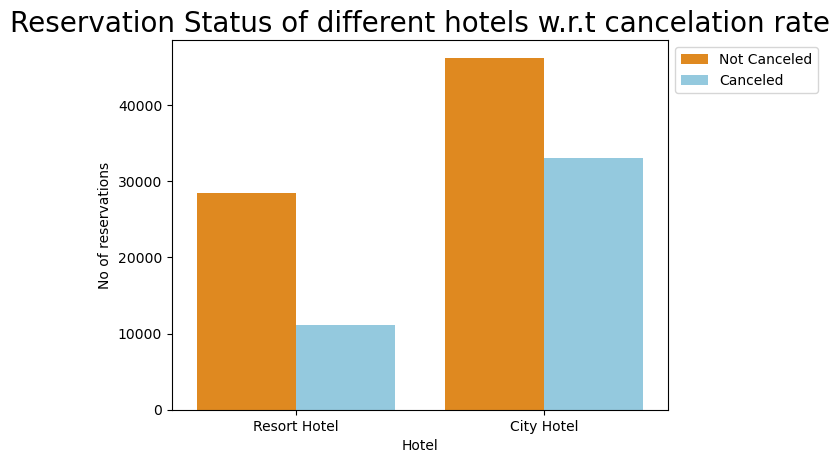

In [65]:
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette=colors)
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Not Canceled', 'Canceled'], bbox_to_anchor=(1, 1))
plt.title('Reservation Status of different hotels w.r.t cancelation rate', size=20)
plt.xlabel('Hotel')
plt.ylabel('No of reservations')
plt.show()

- From this countplot we can see that Resort hotel has less cancellation rate than City hotel 
- The reservations in city hotel are more than in Reosrt hotel .It is possible due to many reason like pricing we will see it in further analysis

In [67]:
resort_hotel=df[df['hotel']== 'Resort Hotel']
resort_hotel_cancelation_rate=resort_hotel['is_canceled'].value_counts(normalize=True)

In [68]:
resort_hotel_cancelation_rate*100

is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64

In [73]:
city_hotel=df[df['hotel'] == 'City Hotel']
city_hotel_cancelation_rate=city_hotel['is_canceled'].value_counts(normalize=True)

In [74]:
city_hotel_cancelation_rate*100

is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64

- As you can see the percentage or cancelled reservations are very high in **City Hotel**

In [76]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

In [77]:
city_hotel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


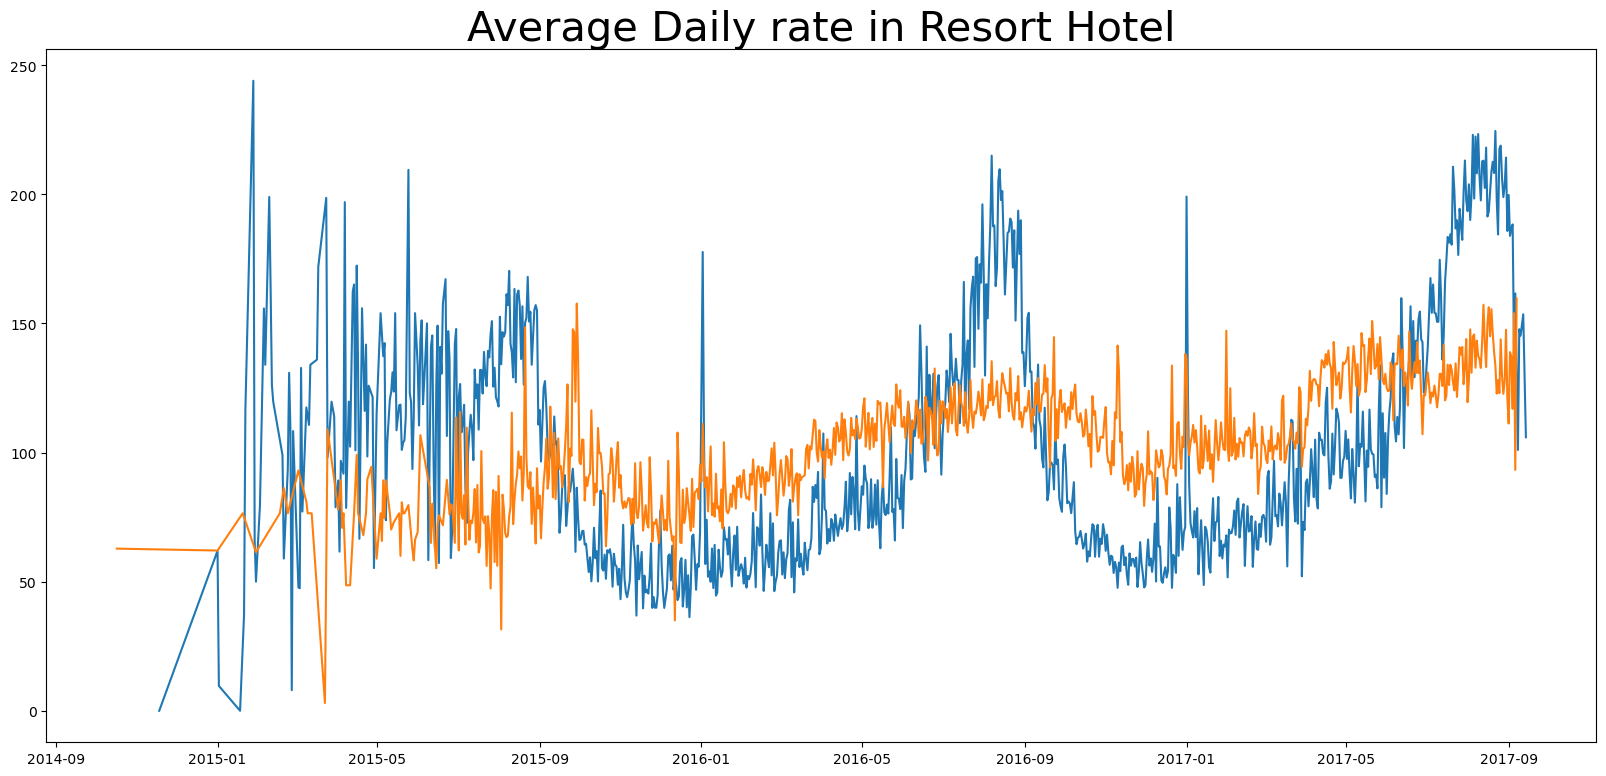

In [78]:
plt.figure(figsize=(20,9))
plt.title('Average Daily rate in Resort Hotel',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.show()

- spikes indicate high adr on weekend
  - city hotel's price is much lower than resort hotel

####  Q-  we have to check in which month the cancellation rate is highest ?

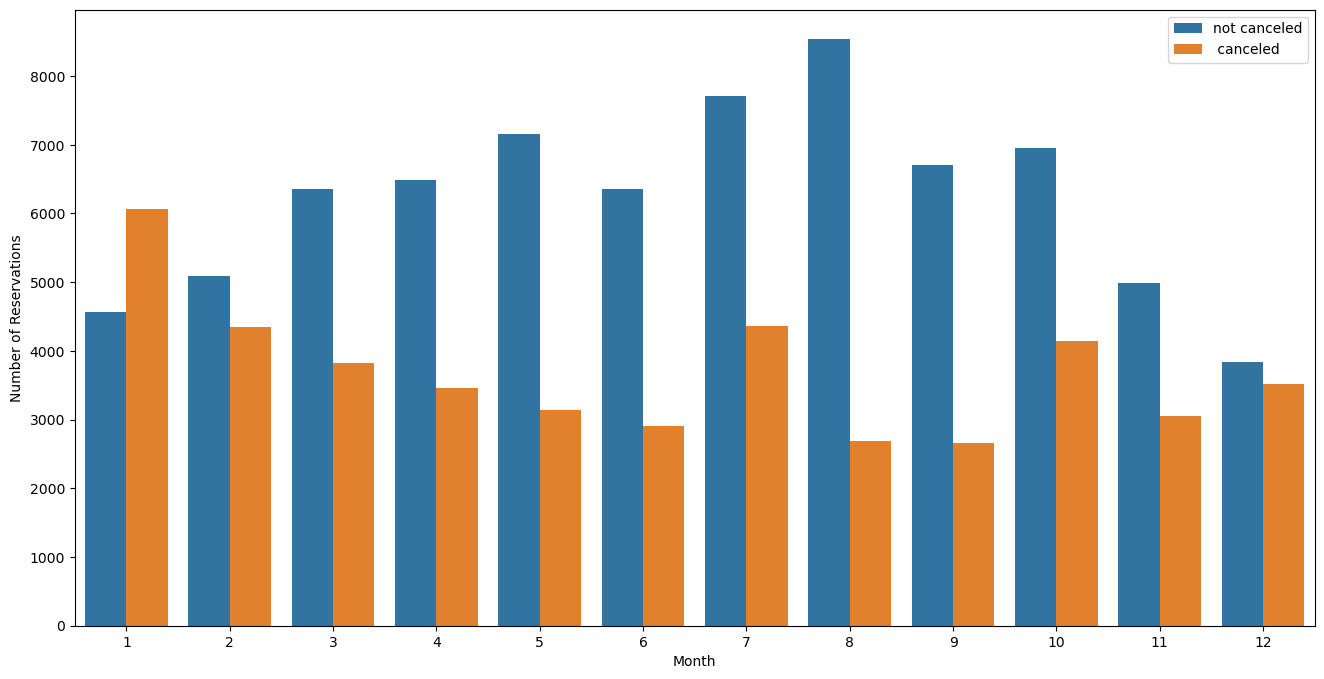

In [80]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=df)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(['not canceled',' canceled'])
plt.show()

- Highest cancelation rate is in the month of January and lowest is in August
- Highest reservations rate is in the month of August and lowest is in the month of December

In [83]:
aug_sep_data = df[(df['reservation_status_date'].dt.month.isin([8, 9]))]
aug_cancel_rate = aug_sep_data[aug_sep_data['month'] == 8]['is_canceled'].mean()
sep_cancel_rate = aug_sep_data[aug_sep_data['month'] == 9]['is_canceled'].mean()
print("Cancellation rate for August:", aug_cancel_rate)
print("Cancellation rate for September:", sep_cancel_rate)


Cancellation rate for August: 0.23915174195847813
Cancellation rate for September: 0.2840047013569826


#### Q- Now we have to check to whether price has an effect on cancellation rate or not?

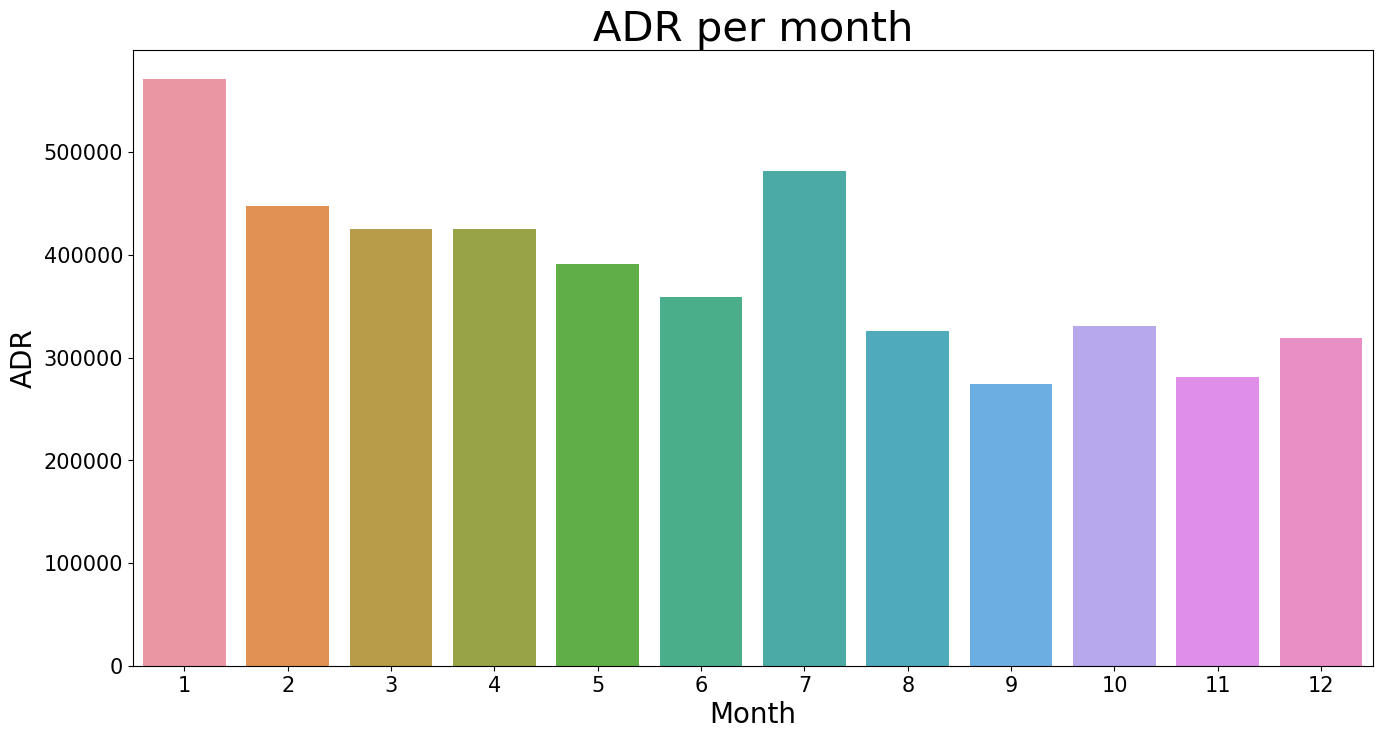

In [85]:
plt.figure(figsize=(16,8))
plt.title('ADR per month', fontsize=30)
adr_per_month_canceled = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()
sns.barplot(x='month', y='adr', data=adr_per_month_canceled)
plt.xlabel('Month', fontsize=20)
plt.ylabel('ADR', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

###### Here we can see ADR w.r.t to month is highest in January most probably it is the reason behind highest cancellation rate in that month

####  Q- Now we have to check in which country the cancellation rate is highest ?
 - Focus on Top 10 countries

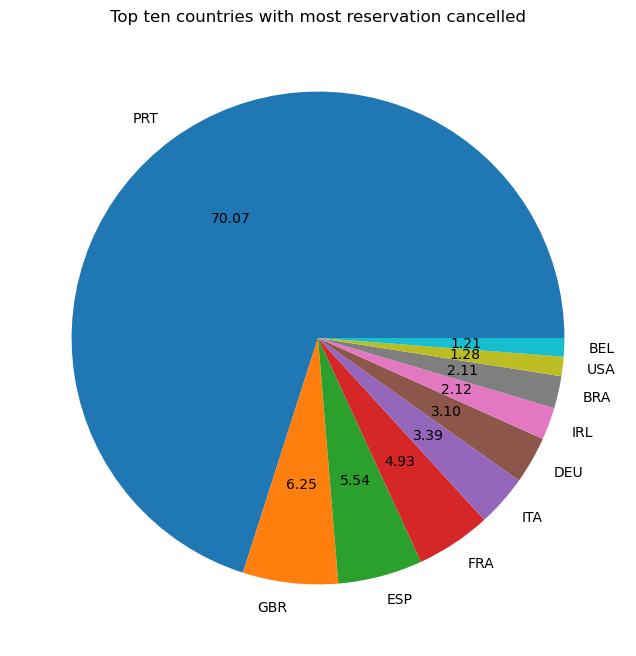

In [100]:
cancelled_data=df[df['is_canceled']==1]
top_10_countries=cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title("Top ten countries with most reservation cancelled")
plt.pie(top_10_countries,autopct='%.2f',labels=top_10_countries.index)
plt.show()

-  Portugal has highest reservation cancellation rate amoung top 10 countries which is **70%**

##### From where majority of clients are coming from like from online travel etc.(this information is in market segment column)?

In [93]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

- here we can see Online travel Agency is on top place

In [111]:
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

- The findings suggest that client dissatisfaction may have arisen when the hotel experience diverged from their expectations based on online representations during the visitation.

##### Now we will Inspecting the adr w.r.t cancellation rate is adr has an effect on reservations being cancelled?

In [97]:
not_cancelled_data=df[df['is_canceled']==0]

In [99]:
cancellation_adr=cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancellation_adr.reset_index(inplace=True)
cancellation_adr.sort_values('reservation_status_date',inplace=True)

not_cancellation_adr=not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancellation_adr.reset_index(inplace=True)
not_cancellation_adr.sort_values('reservation_status_date',inplace=True)                             

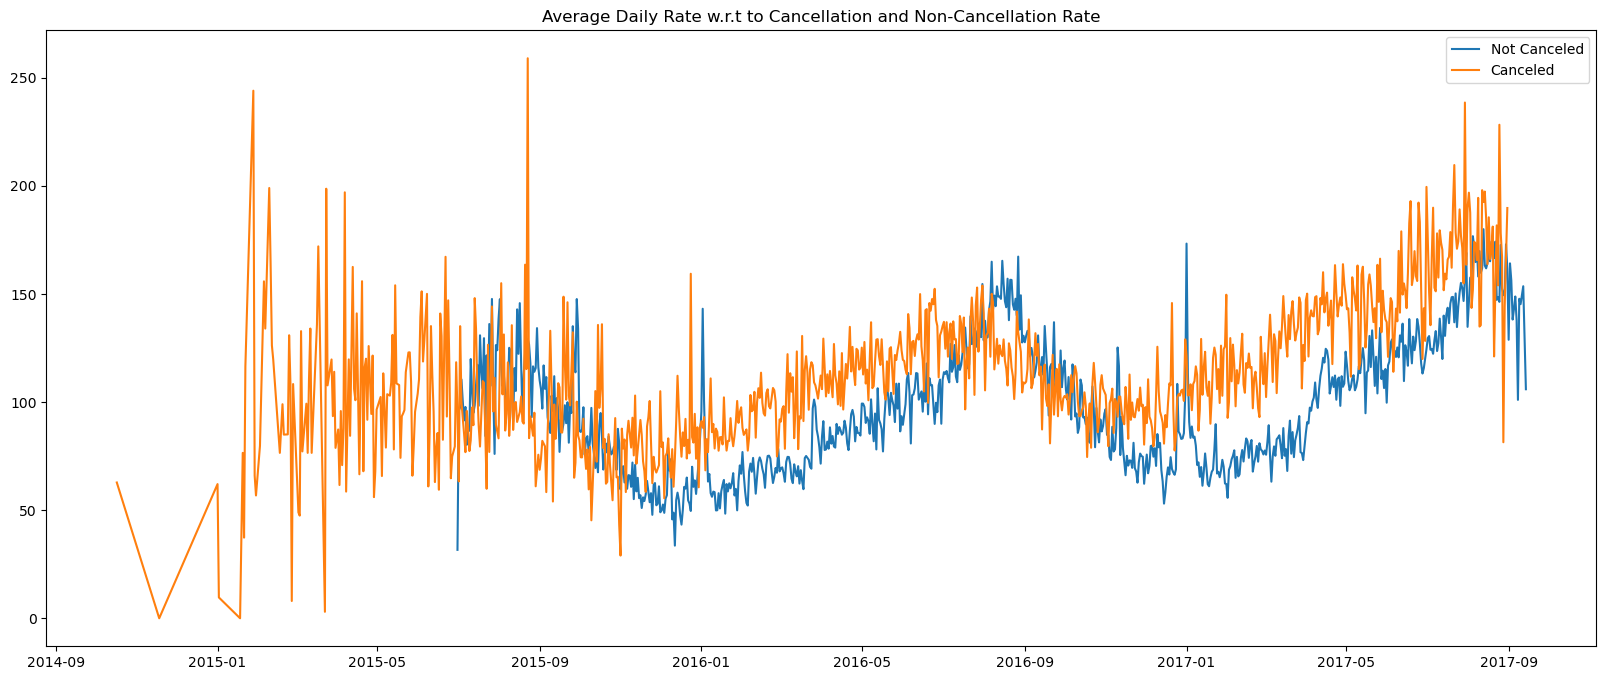

In [104]:
plt.figure(figsize=(20, 8))
plt.title("Average Daily Rate w.r.t to Cancellation and Non-Cancellation Rate")

# Plot ADR for non-canceled bookings
plt.plot(not_cancellation_adr['reservation_status_date'], not_cancellation_adr['adr'], label='Not Canceled')

# Plot ADR for canceled bookings
plt.plot(cancellation_adr['reservation_status_date'], cancellation_adr['adr'], label='Canceled')

plt.legend()
plt.show()


- here we can see that there is an inconsistency in dataset as the year 2015's data is missing for that we will consider from 2016 an onwards

In [107]:
# Filter cancellation_adr for dates after '2016' and before '2017-09'
cancellation_adr = cancellation_adr[(cancellation_adr['reservation_status_date'] > '2016') & 
                                    (cancellation_adr['reservation_status_date'] < '2017-09')]

# Filter not_cancellation_adr for dates after '2016' and before '2017-09'
not_cancellation_adr = not_cancellation_adr[(not_cancellation_adr['reservation_status_date'] > '2016') & 
                                              (not_cancellation_adr['reservation_status_date'] < '2017-09')]


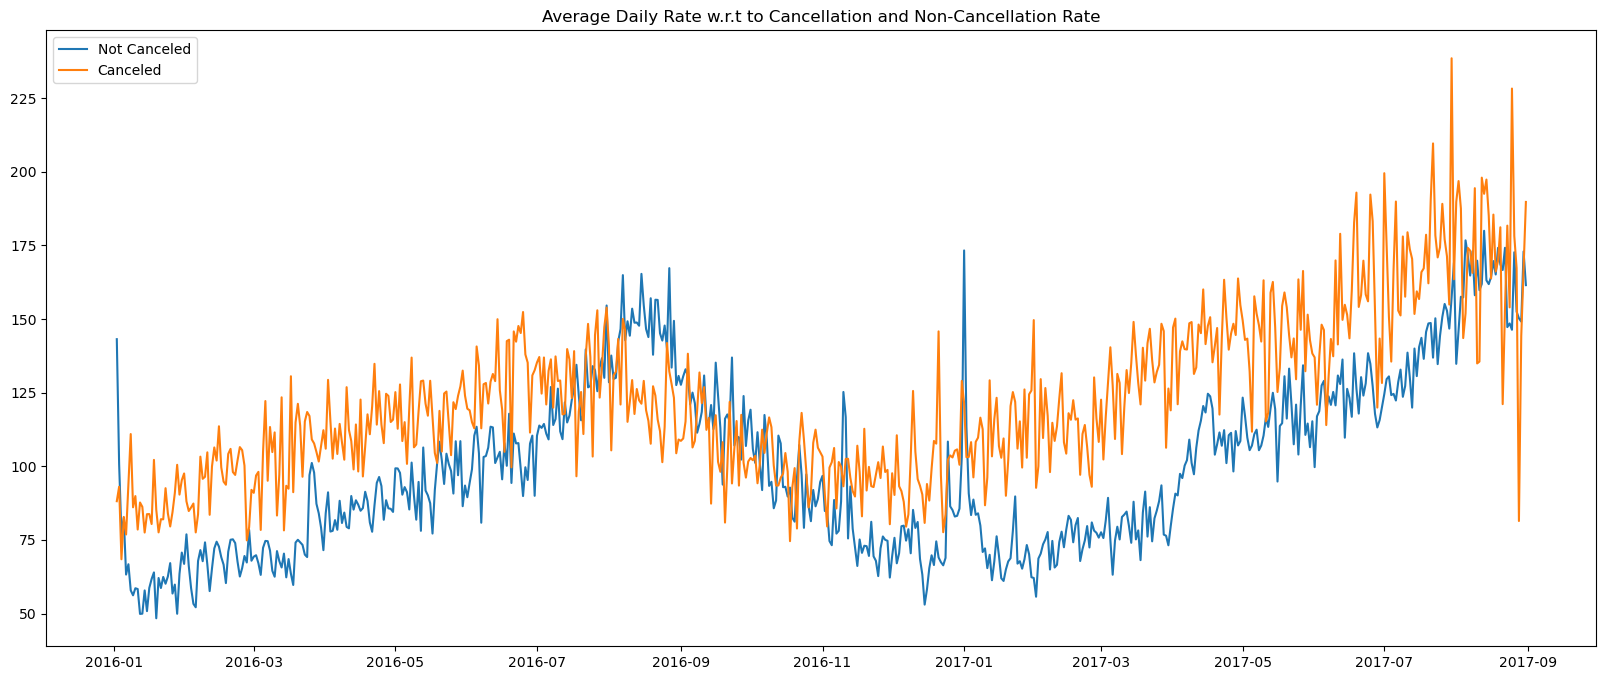

In [108]:
plt.figure(figsize=(20, 8))
plt.title("Average Daily Rate w.r.t to Cancellation and Non-Cancellation Rate")

# Plot ADR for non-canceled bookings
plt.plot(not_cancellation_adr['reservation_status_date'], not_cancellation_adr['adr'], label='Not Canceled')

# Plot ADR for canceled bookings
plt.plot(cancellation_adr['reservation_status_date'], cancellation_adr['adr'], label='Canceled')

plt.legend()
plt.show()


- This graph proves that price do have an effect on cancellation rate

##### Now we will check whether the **days_in_waiting_list** column generally affects cancellation rate or not?

In [117]:
cancellation_rate_by_waiting_list = cancelled_data.groupby('days_in_waiting_list')['is_canceled'].mean()


In [127]:
import pandas as pd

# Define the bin ranges for 'days_in_waiting_list'
bins = [-1, 0, 7, 30, 60, float('inf')]
labels = ['No Waiting', '1 Week or Less', '1 Month or Less', '2 Months or Less', 'More than 2 Months']

# Bin the 'days_in_waiting_list' column
df['waiting_list_bins'] = pd.cut(df['days_in_waiting_list'], bins=bins, labels=labels)

# Display the first few rows of the DataFrame with the new waiting list bins
print(df[['days_in_waiting_list', 'waiting_list_bins']])

        days_in_waiting_list waiting_list_bins
0                          0        No Waiting
1                          0        No Waiting
2                          0        No Waiting
3                          0        No Waiting
4                          0        No Waiting
...                      ...               ...
119385                     0        No Waiting
119386                     0        No Waiting
119387                     0        No Waiting
119388                     0        No Waiting
119389                     0        No Waiting

[118897 rows x 2 columns]


- It directly has no effect on each other